# Exercise 3: Netflix Recommendation Algorithm

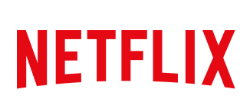

### Do not start the exercise until you fully understand the submission guidelines, which can be found herehttps://docs.google.com/document/d/1Qip08JKIppVX6dGX4hkrUCPgRmgkWYmQLEDZY_yZi90/edit?usp=sharing

#### For any material-related-questions, ask Ami.  For any organization-related-questions, ask the TA.

## Read the following instructions carefully:


1. Write your functions in this notebook only. **Do not create Python modules and import them**.
    1. Feel free to add code blocks if you need.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will **not** be checked.
1. Kind reminder: the total of all exercises weight is 50% of the course's grade!

## This exercise summarizes the following subjects:
1. Netflix's personal recommendations algorithm:
    1. Content Filtering
    1. Collaborative Filtering
    1. Filling missing values in the Rating Matrix
    1. Matrix Factorization
    1. Data correlation finding approaches: SVD, PCA 
1. Applications of SVD and PCA:
    1. Face images compression and recognition using PCA
    1. Hand written digits recognition using SVD/PCA
    1. Correlations detection of mutations in the genom and different populations using SVD/PCA

# Part I: Netflix's Recommendations Algorithm

We demonstrated in class how to find similar movies (and recommend movies to a user, similar to a movie he likes), using **Ratings Matrix** where a list of users partially rated a list of movies. In class, we demonstarted 2 ways to handle the Rating Matrix using Excel sheets:

1. Calculate similarities (distances) between movies using the 1 to 5 rating values.
2. Turn the Rating Matrix into a **boolean** matrix where R(i,j)=TRUE if User i rated movie j above some threshold TH (1<=TH<=5).
Note that if TH=1 we get a rating matrix where **any** rating of a movie become TRUE in the boolean rating matrix. As mentioned in class, even such elementary representation is, supresingly, good data to work with.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Question 1 (20 points)

Write a code, based on the students' rating matrix (attatched to the homework assignment file: *our_course_ratings.csv*), to generate recommendations <ins>exactly</ins> as we demonstrated in class. That is, first translate the rating matrix to a boolean matrix using TH as a parameter in the code (use: TH=3 when you run the code. That is, ratings >= TH are marked TRUE, all other ratings, and non-ratings (zero values in the rating matrix) are FALSE. Make sure you allow to change TH to any new value from 1 to 5). Then, with the boolean rating matrix, your code will ask the user to enter a movie he liked, and present few movies that are most similar, and therefeore recommended for the user to watch.

Perform the task in the following sequence of operations.

#### 1.1 Read the Rating Matrix data (5 points)
Read the students' ratings matrix.

In [2]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
# Fill the Rating matrix, M, with data from the CSV file.
# Matrix Pre Proccesing
df = pd.read_csv('our_course_ratings.csv', na_values='#DIV/0!')
df = df.fillna(0)
movieNames = df.iloc[2:,1]
movieNames.index -= 1
df = df.iloc[2:,2:]
df = df.reset_index().drop('index', axis=1)
df.index += 1
M = df
userNames = list(M.columns)[:-3]
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################
M

,Adi Z,Adir A,Amit E,Amit N,Amit Z,Artsi S,Asif A,Ami S,Barak A,Ben M,...,Tamir K,Tomer F,Yoav F,Yonatan L,Yuval D,Nir D,Nir K,ClassicUser,Anim-child,Action-Fict
1,4.0,3.0,3.0,4.0,3.0,0.0,0.0,5.0,5.0,0.0,...,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,4.0,4.0,0.0,0.0,3.0,1.0,5.0,0.0,...,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,3.0,5.0,3.0,4.0,4.0,1.0,4.0,0.0,...,1.0,0.0,3.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,5.0
5,0.0,0.0,4.0,4.0,0.0,0.0,0.0,1.0,5.0,0.0,...,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.2 Recommendation algorithm implementation (15 points)
Implement the recommendation algorithm as we have seen in class. You can look at the excel and the calculations we did in it to create a "python version" of the algorithm.

Implement **GetUserFavoriteMovie()** :
1. Ask the user to enter a valid movieID.
1. Check it is valid (<u>do not</u> let the code crash or error if a value too high or too low or not an integer is entered by the user).
1. If it is valid user_movieID, print the user_movie_name (The complete string, as written in the excel sheet "Movie list").
1. Validate with the user this **is** the movie they liked.
1. If user changed his mind, allow him to enter **new** user_movieID and validate again in a loop until user confirms the user_movieID chosen.
1. Return the final user_movieID.

In [3]:
def GetUserFavoriteMovie() -> int:
    user_movie_name = None
    user_movieID = None
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    while True:
        movieID=input("Enter a valid movieID ")
        if not(movieID.isnumeric()) or int(movieID) > len(M) or  int(movieID) < 1:
            print("We are Sorry, this is not a valid movie ID")
            continue
        else:
            isMovie = -1
            user_movieID = int(movieID)
            user_movie_name = movieNames[user_movieID]
            while True:
                isMovie = input(f'Is {user_movie_name} your movie choice?[y/n] ')
                if isMovie == 'y':
                    break
                elif isMovie == 'n':
                    print("Ok.")
                    break
                elif isMovie != 'y' or isMovie != 'n':
                    print("Sorry, this is not a valid answer. Please answer y or n.")
                    continue
            if isMovie == 'y':
                break
            else:
                continue
    print(f'The user said he likes movie #"{user_movieID}": "{user_movie_name}"')
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return user_movieID

In [4]:
a = GetUserFavoriteMovie()

Enter a valid movieID 1
Is Avatar (2009) your movie choice?[y/n] y
The user said he likes movie #"1": "Avatar (2009)"


Implement **recommendation_alg()** :
1. Receive the Rating Matrix & user_movieID
1. Return $k$ other movies (not the movie they liked) recomended for him to watch. Recomended movies will be given by full name, not movie id.

In [5]:
TH = 3

In [6]:
def recommendation_alg(M, movieNames, movie_id: int, TH=3, k: int = 3):
    '''
    Receives a movie the user likes and returns k other movies he might like.
    :param M: a ratings matrix
    :param movieNames: a movie names matrix
    :param TH: the threshold value
    :param movie_id: the id of the movie the user likes.
    :print the name of the movie id based on the movies list (it is in the same excel document the ratings are)
    :return: 3 other movies he might like, by names, not ids
    '''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    # Translate the rating matrix to a boolean matrix using TH as a parameter
    df = M.copy()
    df[df < TH] = 0
    df = df > 0
    
    # Transalting the True / False Matrix to a 1 / 0 matrix
    df = df.astype(float)
    
    # Calculating the absolute value distance of the chosen movie with all other movies
    distances = np.abs(df - df.loc[movie_id])
    
    # Summing up values, sorting and dropping the chosen movie
    similarities = distances.sum(axis=1).sort_index().sort_values(kind='stable').drop(movie_id)
    similarities = similarities.head(k)
    recommendations = list(similarities.index)
    recommendations = list(movieNames[recommendations])
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    assert type(recommendations) is list
    assert type(recommendations[0]) is str
    return recommendations

In [7]:
recommendation_alg(M, movieNames, 15)

['Harry Potter and the Deathly Hallows, Part 1 (2010)',
 'Harry Potter and the Half-Blood Prince (2009)',
 "Harry Potter and the Sorcerer's Stone (2001)"]

Implement **recommend()**:

1. Use the two earlier function you have implemented.

**Make sure first match has higher similarity score than the second one.** If it does not, <u>do not</u> submit the work, it is not working ok.

Finally, use <i>GetUserFavoriteMovie()</i> to get any movie the user likes and return k=3 other movies as a recommendation.

In [8]:
def recommend(M, movieNames, TH=3, k: int = 3):
    '''
    Ask a user input which is a movie the user likes and prints k other movies he might like.
    Validates user input.
    :param M: a ratings matrix
    :param movieNames: a movie names matrix
    :param TH: the desired TreshHold
    :param k: number of movies to recommend
    '''
    user_movieID = -1
    user_movie = ''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    user_movieID = GetUserFavoriteMovie()
    recommendations = recommendation_alg(M, movieNames, user_movieID, TH, k)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    print(f'We recommend to watch: {recommendations}')

test the results using the following movieIDs (we will run it as well):

1. MovieID=15 (Harry Potter and the Deathly Hallows, Part 2).

1. MovieID=34 (Joker).

In [9]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
recommend(M, movieNames)
print('\n')
recommend(M, movieNames)
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

Enter a valid movieID 15
Is Harry Potter and the Deathly Hallows, Part 2 (2011) your movie choice?[y/n] y
The user said he likes movie #"15": "Harry Potter and the Deathly Hallows, Part 2 (2011)"
We recommend to watch: ['Harry Potter and the Deathly Hallows, Part 1 (2010)', 'Harry Potter and the Half-Blood Prince (2009)', "Harry Potter and the Sorcerer's Stone (2001)"]


Enter a valid movieID 34
Is Joker (2019) your movie choice?[y/n] y
The user said he likes movie #"34": "Joker (2019)"
We recommend to watch: ['The Dark Knight (2008)', 'Spider-Man: Far from Home (2019)', 'Spider-Man: No Way Home (2021)']


## Question 2 (40 points)

Write a code that, using **SVD** analysis of the rating matrix, does the following 3 tasks (exactly as explained in class):
1. Show X=3 movies most similar to a certain movie
1. Shows X=3 users most similar to a certain user (choose yourself as the user and compare to the rest of the class to you).
1. Recommend X=3 movies to a user based on the vector representing the user preferences in martix $V^T$ and the movies data in matrix $U$.


You can look at the following implementations of SVD analysis to make sure your write the SVD analysis right. Note that the code in these links do **not** do exactly what you are asked to do here. You need to write your own code.

1. https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/

1. https://www.section.io/engineering-education/singular-value-decomposition-in-python/

### 2.1 Using SVD to calculate values in the original rating matrix M (5 points)
1. Make sure you use $M$ correctly. $M$ should have **users** as its **colomns** and **movies** as its **raws**.
1. Perform SVD on the ratings matrix, $M$. Remember: $U, S, V = np.linalg.svd(M)$ is a built-in function in python.
1. Calculate and print column i=1 of $M, M[i]$ using $U, S, V$. 
1. Calculate and print row j=15 of $M$ using $U, S, V$.

If your prints are **not** _excactly_ the same as the original rating matrix column and row, do **not** proceed. Check your code and fix it.

In [10]:
# Calculated the SVD decomposition of the original rating matrix M.
# Make sure the matrix M you work with has for columns the ratings of the users,
# i.e. column i has all the ratings of a specific user i for the movies he rated.
U, S, V = np.linalg.svd(M)
    
def calculateSpecificRating(U, S, V, row: int, column: int):

    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
     ## Return a zero-matrix with S as main-diagonal
    S_matrix = np.diag(S)
    S_zero_matrix = np.vstack((np.diag(S), np.zeros((U.shape[0]-np.diag(S).shape[1], np.diag(S).shape[1]))))
    P = U @ S_zero_matrix @ V
    P[np.isclose(P,0,atol=1e-2)] = 0
    r = round(P[row,column],2)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    return (r)  # Returns the rating of user at M 'column' to movie at M 'row'
            # this MUST be exactly the value of M(row, column) but *without* having M for the calculation

In [11]:
def compareArr(arr1, arr2):
    if (arr1 == arr2).all():
        print(True)
    else:
        print(False)

In [12]:
col1 = []
for i in range(len(M)):
    col1.append(calculateSpecificRating(U, S, V, i, 1))
col1 = np.array(col1)
compareArr(col1, M.iloc[:,1].values)
print(col1)
    
row15 = []
for i in range(M.shape[1]):
    row15.append(calculateSpecificRating(U, S, V, 15, i))
row15 = np.array(row15)
compareArr(row15, M.iloc[15,:].values)
print(row15)

True
[3. 0. 0. 0. 0. 3. 0. 4. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0.
 0. 0. 0. 0. 0. 0. 4. 0. 5. 4. 0. 0. 0. 5. 5. 0. 0. 5. 5. 3. 0. 0. 0. 0.
 0. 5. 0. 0. 5. 0. 4. 0. 5. 0. 0. 0. 0. 0. 0. 5. 0. 4. 0. 0. 0. 0. 0. 4.
 0. 0. 0. 0. 5. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [13]:
print(f'The Value at M[0,1] is: {M.values[0,1]}, and the value of the function with (0,1) is: {calculateSpecificRating(U,S,V,0,1)}')
print(f'The Value at M[0,0] is: {M.values[0,0]}, and the value of the function with (0,0) is: {calculateSpecificRating(U,S,V,0,0)}')
print(f'The Value at M[1,8] is: {M.values[1,8]}, and the value of the function with (1,8) is: {calculateSpecificRating(U,S,V,1,8)}')

The Value at M[0,1] is: 3.0, and the value of the function with (0,1) is: 3.0
The Value at M[0,0] is: 4.0, and the value of the function with (0,0) is: 4.0
The Value at M[1,8] is: 5.0, and the value of the function with (1,8) is: 5.0


### 2.2 Implementing recommendation algorithm using k-elements of SVD analysis of the rating matrix (30 points)
Use **cutSVD()** on the matrices $U, S, V$ to keep only the 1st k-columns of $U$, first k-scalars of $S$ and 1st k-rows of $V$. The size of the cut matrices is explained in detail in the class presentation. Use $k=10$ when you run the code. Remember to keep k a parameter in the code that is assinged a value. Do **not** use a number directly in the code. 

Use the cut matrices U_cut, S_cut, V_cut to do the follwing:
1. Show X=3 movies most similar to a certain movie. If the results are not as in question #1, try to change the value of $k$ and see how if effects the results. Discuss shortly the results.
1. Shows X=3 users most similar to a certain user (choose yourself as the user and compare to the rest of the class to you). If the results are not as in question #1, try to change the value of $k$ and see how if effects the results. Discuss shortly the results.
1. Recommend X=3 movies to a user based on the vector representing the user preferences in martix $V^T$ and the movies data in matrix $U$.

**Note**: To decide how similar 2 vectors 1 by k are to each other, choose one of the metrics we saw in class:
$$MSE(x,y) = SQRT( (x_1-y_1)^2 + (x_2-y_2)^2 + … + (x_k-y_k)^2)$$
$$or$$
$$L_1(x,y) = |x_1-y_1| + |x_2-y_2| + … + |x_k-y_k|$$

In [14]:
def cutSVD(U, S, V, k):
    '''
    Receives U, S, V and k and return the cut matrices U_cut, S_cut, V_cut.
    :param U: U part of SVD
    :param S: S part of SVD
    :param V: V part of SVD
    :param k: how many parameters from the original matrices to keep
    :return: U, S, V that are cut to the desired size
    '''
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    U_cut = U[:, :k]
    S_cut = np.diag(S[:k])
    V_cut = V[:k, :]
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return U_cut, S_cut, V_cut

In [15]:
def dist(x, y) -> float:
    '''
    Calculate the similarity of 2 movies/users.
    :param x: movies/users
    :param y: movies/users
    :return: distance / similarity score
    '''
    d = 0
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    d = float((np.square(x - y)).mean())
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    assert type(d) is float
    return d

In [16]:
def similarMovies(U_cut, S_cut, V_cut, movieNames, movie_id: int, x: int = 3):
    '''
    Receives a movie the user likes and returns x movies he might also like.
    :param U_cut, S_cut, V_cut: the SVD presentation of the ratings matrix M,
    : after is was cut using cutSVD(U, S, V, k)
    :param movie_id: the id of the movie the user likes
    :param x: number of best results to return
    :return: X other movies he might like, by names, not ids
    '''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    # Pre process the matrix U_cut to a dataframe
    df = pd.DataFrame(U_cut)
    df.index += 1
    rec = []
    
    # Calculating the distances between movie_id and every other movie as tuple (movie_id, distance)
    for i in range(1, len(df)+1):
        rec.append((i,dist(df.loc[i,:], df.loc[movie_id,:])))
        
    # Sorting by distances and creating the list of recommendations    
    
    rec = sorted(rec,key=lambda x: x[1])[1:x+1]
    rec = list(list(zip(*rec))[0])
    recommendations = list(movieNames[rec])
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    assert type(recommendations) is list
    assert type(recommendations[0]) is str
    return recommendations

In [17]:
movieNames[15]

'Harry Potter and the Deathly Hallows, Part 2 (2011)'

In [18]:
U_cut, S_cut, V_cut = cutSVD(U, S, V, 10)
similarMovies(U_cut, S_cut, V_cut, movieNames, 15, 4)

['Harry Potter and the Half-Blood Prince (2009)',
 "Harry Potter and the Sorcerer's Stone (2001)",
 'Harry Potter and the Deathly Hallows, Part 1 (2010)',
 'Harry Potter and the Order of the Phoenix (2007)']

In [19]:
def similarUsers(U_cut, S_cut, V_cut, userNames, user_id: int, x: int = 3):
    '''
    Receives a user_id the user likes and returns x other users most similar to this user.
    :param U_cut, S_cut, V_cut: the SVD presentation of the ratings matrix M,
    : after is was cut using cutSVD(U, S, V, k)
    :param user_id: the id of the user analysed
    :param x: number of best results to return
    :return: X other users most similar to the user, by names, not ids
    '''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    rec = []
    df = pd.DataFrame(V_cut)
    # Calculating the distances between user_id and every other user as tuple (user_id, distance)
    for i in range(0,df.shape[1]):
        rec.append((i,dist(df.loc[:,i], df.loc[:,user_id])))
    
    # Sorting by distances and creating the list of recommendations    
    rec = sorted(rec,key=lambda x: x[1])[1:x+1] # Sort by second element
    rec = list(list(zip(*rec))[0]) # Accesing first value of the tuples
    for nameID in rec:
        recommendations.append(userNames[nameID])
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    assert type(recommendations) is list
    assert type(recommendations[0]) is str
    return recommendations

In [20]:
similarUsers(U_cut, S_cut, V_cut, userNames, 14, 3)

['Adi Z', 'Daniella Z', 'Yuval D']

In [21]:
def SVDFullRecomendationAlgo(U_cut, S_cut, V_cut, user_id: int, movieNames, x: int = 3):
    '''
    Receives a user_id and returns x movies most recommended to this user
    Based on ALL the users preferences as represented in the cut-U-S-V matrices.
    :param U_cut, S_cut, V_cut: the SVD presentation of the ratings matrix M,
    : after is was cut using cutSVD(U, S, V, k)
    :param user_id: the id of the user analysed
    :param x: number of best results to return
    :return: X most recommended movies he might like, by names, not ids
    '''
    recommendations = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    dfU = pd.DataFrame(U_cut)
    dfV = pd.DataFrame(V_cut)
    user = dfV.loc[:,user_id]
    dfU.index += 1
    rec = []
    for i in range(1, len(dfU)+1):
        rec.append((i, dfU.loc[i,:] @ user))
    rec = sorted(rec,key=lambda x: x[1], reverse=True)[0:x]
    rec = list(list(zip(*rec))[0])
    recommendations = list(movieNames[rec])
    recommendations
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    assert type(recommendations) is list
    assert type(recommendations[0]) is str
    return recommendations

In [22]:
print(f'{userNames[14]} user number is 14')
print(f'{userNames[30]} user number is 30\n')

print(f'Reccomended movies for {userNames[14]}:')
print('\n'.join(SVDFullRecomendationAlgo(U_cut, S_cut, V_cut, 14, movieNames, 3)))
print()
print(f'Reccomended movies for {userNames[30]}:')
print('\n'.join(SVDFullRecomendationAlgo(U_cut, S_cut, V_cut, 30, movieNames, 3)))

Dor S user number is 14
Lior Liv user number is 30

Reccomended movies for Dor S:
The Lion King (2019)
Harry Potter and the Deathly Hallows, Part 2 (2011)
Harry Potter and the Sorcerer's Stone (2001)

Reccomended movies for Lior Liv:
Inception (2010)
Forrest Gump (1994)
The Matrix (1999)


### 2.3 Comparisings and discussion (5 points)
Submit the same ids as in 1.2 and show the results with the k-cut SVD method. Discuss the difference bewtween the outputs here and from question 1. How many values from the SVD decomposition (ie: what minimum k) gives answers as good as, or better, than the results using the code from question 1?

In [23]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
U_cut, S_cut, V_cut = cutSVD(U, S, V, 9)

first_15 = recommendation_alg(M, movieNames, 15)
first_34 = recommendation_alg(M, movieNames, 34)
sec_15 = similarMovies(U_cut, S_cut, V_cut, movieNames, 15)
sec_34 = similarMovies(U_cut, S_cut, V_cut, movieNames, 34)

print(f'The movies simillar to {movieNames[15]} with the first algorithm are:')
print('\n'.join(first_15))
print()
print(f'The movies simillar to {movieNames[15]} with the second algorithm with k=9 are:')
print('\n'.join(sec_15))
print()
print(f'The movies simillar to {movieNames[34]} with the first algorithm are:')
print('\n'.join(first_34))
print()
print(f'The movies simillar to {movieNames[34]} with the second algorithm with k=9 algorithm are:')
print('\n'.join(sec_34))
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

The movies simillar to Harry Potter and the Deathly Hallows, Part 2 (2011) with the first algorithm are:
Harry Potter and the Deathly Hallows, Part 1 (2010)
Harry Potter and the Half-Blood Prince (2009)
Harry Potter and the Sorcerer's Stone (2001)

The movies simillar to Harry Potter and the Deathly Hallows, Part 2 (2011) with the second algorithm with k=9 are:
Harry Potter and the Half-Blood Prince (2009)
Harry Potter and the Order of the Phoenix (2007)
Harry Potter and the Sorcerer's Stone (2001)

The movies simillar to Joker (2019) with the first algorithm are:
The Dark Knight (2008)
Spider-Man: Far from Home (2019)
Spider-Man: No Way Home (2021)

The movies simillar to Joker (2019) with the second algorithm with k=9 algorithm are:
The Dark Knight (2008)
The Dark Knight Rises (2012)
Avatar (2009)


### Answer for 2.3
As we can see, with k=9 we get almost the exact results as the algorithm from Q1!<br>
All of the reccomendations for Harry Potter gives other Harry Potter kind of movies.<br>
For The Joker, the first algorithm returns The Dark Knight and two Spider-Man movies,<br>
and the second algorithm returns two The Dark Knoght movies, and Avatar movie as well.<br>
We beleive that the both algorithms gave The Joker really good recommendations, which is very good!<br>
In general, we have different but similar results with both algorithms.